In [19]:
import os
import numpy as np
import pandas as pd
import nibabel as nib
import nilearn as nil
from scipy import io as sio
from matplotlib import gridspec
from nilearn import plotting as nlp
from matplotlib import pyplot as plt

In [20]:
%matplotlib inline

In [21]:
# Paths
network = 1
in_1 = '/data1/guilimin/data/preventAD/subtype_TRT/subtype/sc7/pre/base_r1/network_{0}/network_{0}_subtype.mat'.format(network)
#in_2 = '/data1/guilimin/data/preventAD/subtype_TRT/subtype/sc7/pre/base_r2/network_{0}/network_{0}_subtype.mat'.format(network)
in_2 = '/data1/guilimin/data/abide/subtype/sc7/full_pass/network_{0}/network_{0}_subtype.mat'.format(network)
sbt_path = '/home/surchs/VM_Transfer/subtypes/TRT'
sbt2_path = '/data1/guilimin/data/abide/subtype/sc7/subtype_stacks'

In [22]:
maps_1 = sio.loadmat(in_1)['sub']['map'][0,0]
maps_2 = sio.loadmat(in_2)['sub']['map'][0,0]

In [23]:
l = list()
for x in range(5):
    for y in range(5):
        v = np.corrcoef(maps_1[x, ...], maps_2[y, ...])[0,1]
        l.append(v)
lu = np.array(l)
m = np.reshape(lu, (5,5))

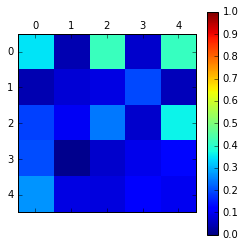

In [24]:
plt.matshow(np.abs(m), vmax=1, vmin=0)
plt.colorbar()

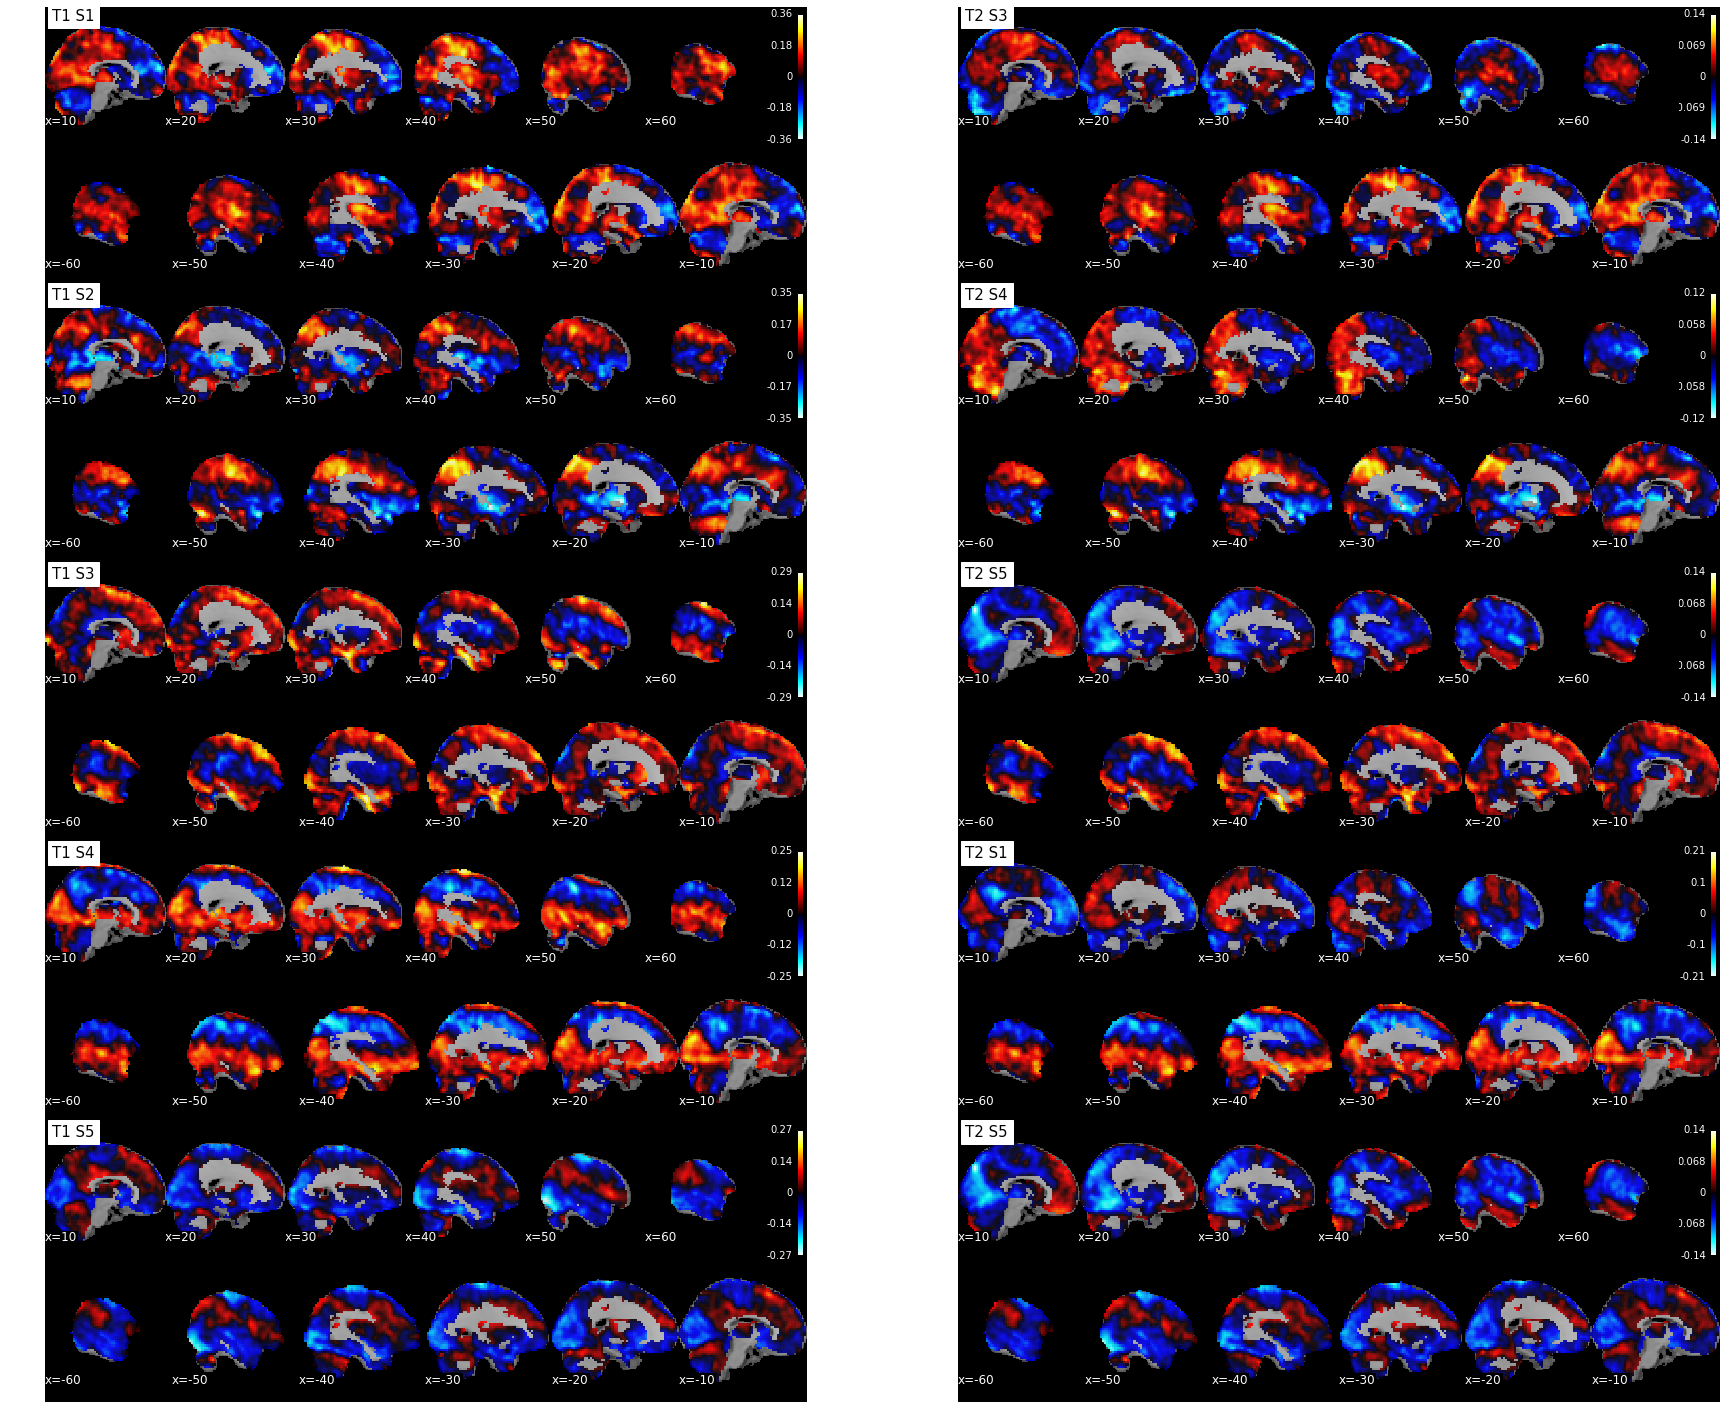

In [25]:
mx = np.argmax(m, 1)

fig = plt.figure(figsize=(30,25))
gs = gridspec.GridSpec(10, 2, hspace=0)

for sbt_id, fig_pos in enumerate(np.array([0, 2, 4, 6, 8])):
    a_img = nib.load(os.path.join(sbt_path, 'base_1_net_{0}_sbt_{1}.nii.gz'.format(network, sbt_id+1)))
    #b_img = nib.load(os.path.join(sbt_path, 'base_2_net_{0}_sbt_{1}.nii.gz'.format(network, mx[sbt_id]+1)))
    b_img = nib.load(os.path.join(sbt2_path, 'full_pass_net_{}_sbt_{}.nii.gz'.format(network, mx[sbt_id]+1)))
    
    ax_up = fig.add_subplot(gs[fig_pos,0])
    ax_dn = fig.add_subplot(gs[fig_pos+1,0])
    
    tmp = nlp.plot_stat_map(a_img, display_mode='x', alpha=0.9,
                            cut_coords=np.arange(60,0,-10), black_bg=True, axes=ax_up,
                            title='T1 S{}'.format(sbt_id+1))
    tmp = nlp.plot_stat_map(a_img, display_mode='x', alpha=0.9,
                            cut_coords=np.arange(-60,0,10), black_bg=True, axes=ax_dn, colorbar=False)
    
    bx_up = fig.add_subplot(gs[fig_pos,1])
    bx_dn = fig.add_subplot(gs[fig_pos+1,1])
    
    tmp = nlp.plot_stat_map(b_img, display_mode='x', alpha=0.9,
                            cut_coords=np.arange(60,0,-10), black_bg=True, axes=bx_up,
                            title='T2 S{}'.format(mx[sbt_id]+1))
    tmp = nlp.plot_stat_map(a_img, display_mode='x', alpha=0.9,
                            cut_coords=np.arange(-60,0,10), black_bg=True, axes=bx_dn, colorbar=False)